# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook

<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('telecom_users.csv', index_col='customerID')

df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Проверим есть ли в данных пропущенные значения

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null 

Сбросим колонку `Unnamed: 0`, так как не понятно, к чему она относится.


In [ ]:
df.drop(columns="Unnamed: 0", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null 

`TotalCharges` лучше перевести в числовой формат. Обратим внимание что в колонке `TotalCharges` присутствует строка " " в ряду номер 356. Зададим ее значение величиной np.nan. Теперь пропущенные значения есть :)

---



In [ ]:
df.TotalCharges[df.TotalCharges == " "] = np.nan
df.TotalCharges = pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Визуализируем статистику по числовым колонкам.

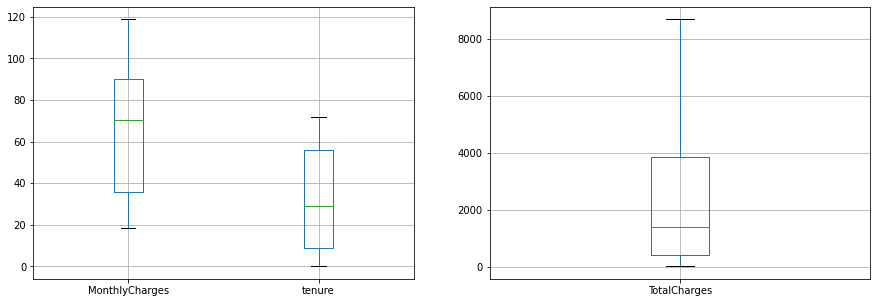

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(121);
ax = df[['MonthlyCharges', 'tenure']].boxplot(ax=ax)
ax = plt.subplot(122);
ax = df[['TotalCharges']].boxplot(ax=ax)

Распределение `TotalCharges` сильно ассиметрично и имеет "хвост" в сторону больших значений.

В датасете имеется 5986 записей о 5986 клиентах. Посчитаем распределение клиентов по категориям.


In [ ]:
print(f"Процент пенсионеров: {(df.SeniorCitizen == 1).sum()/len(df) * 100. :.2f}")
print(f"Процент женатых: {(df.Partner == 'Yes').sum()/len(df) * 100. :.2f}")
print(f"Процент женщин: {(df.gender == 'Female').sum()/len(df) * 100. :.2f}")
print(f"Процент имеющих иждивенцев: {(df.Dependents == 'Yes').sum()/len(df) * 100. :.2f}")

Процент пенсионеров: 16.14
Процент женатых: 48.51
Процент женщин: 49.05
Процент имеющих иждивенцев: 29.92


Посчитаем процент ушедших в отток клиентов:

In [ ]:
print(f"Процент ушедших в отток: {len(df.Churn[df.Churn == 'Yes']) / len(df) * 100. : .2f}%")

Процент ушедших в отток:  26.51%


Количества оставшихся и ушедших в отток клиентов не являются хорошо сбалансированными, поскольку количество оставшихся превышает количество ушедших в три раза.

# 2. Исследование зависимостей и формулирование гипотез

Переведем все категориальные данные в числовую форму, создав для этого новые колонки. При этом отсортируем категории так, чтобы числа шли в соответствии с ростом оттока.

In [ ]:
str_to_num = dict()
df.loc[df.Churn == 'Yes', 'Churn'] = 0
df.loc[df.Churn == 'No', 'Churn'] = 1
df.loc[:, 'Churn'] = df.Churn.astype(int)
for c in df.columns:
  if df[c].dtype == object and c != 'Churn':
    num = 0
    df[c + '_num'] = 0
    for val in df[[c, 'Churn']].groupby(c).mean().sort_values('Churn').reset_index()[c]:
      df.loc[df[c] == val, c + '_num'] = num
      num += 1
    str_to_num[c] = c + '_num'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                5986 non-null   object 
 1   SeniorCitizen         5986 non-null   int64  
 2   Partner               5986 non-null   object 
 3   Dependents            5986 non-null   object 
 4   tenure                5986 non-null   int64  
 5   PhoneService          5986 non-null   object 
 6   MultipleLines         5986 non-null   object 
 7   InternetService       5986 non-null   object 
 8   OnlineSecurity        5986 non-null   object 
 9   OnlineBackup          5986 non-null   object 
 10  DeviceProtection      5986 non-null   object 
 11  TechSupport           5986 non-null   object 
 12  StreamingTV           5986 non-null   object 
 13  StreamingMovies       5986 non-null   object 
 14  Contract              5986 non-null   object 
 15  PaperlessBi

Построим матрицу корреляции оттока с различными переменными


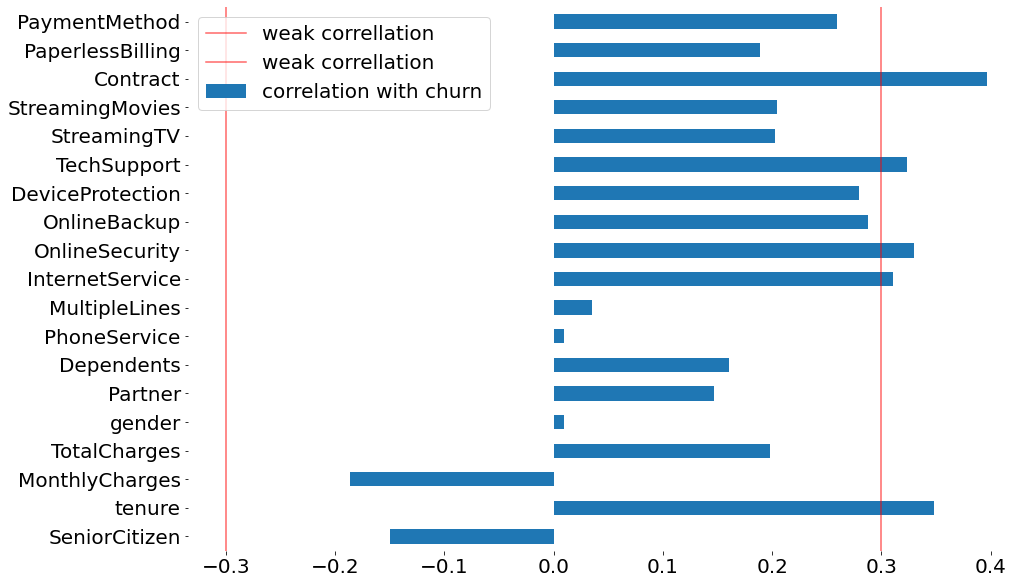

In [ ]:
numeric_features = list([c for c in df.columns if is_numeric_dtype(df[c])])
plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 20
df[numeric_features].corr().Churn.drop(index='Churn').plot.barh(label='correlation with churn')
plt.yticks(ticks=range(len(numeric_features) - 1), labels= [n.split('_')[0] for n in numeric_features if n != 'Churn'])
plt.axvline(-0.3, color='r', label='weak correllation', alpha=0.6)
plt.axvline(0.3, color='r', label='weak correllation', alpha=0.6)
plt.legend()
plt.box(None)

Отток в большинстве случаев очень слабо коррелирует с полученными числовыми переменными. При этом есть слабая корреляция вероятности для клиента остаться компании с количеством месяцев, когда человек являлся клиентом компании: постоянные клиенты реже уходят в отток. Корреляция с оттоком для большей части категориальных переменных является оттчасти искусственной и в большинстве случаев очень слабая, хотя для четырех переменных: `InternetService, OnlineSecurity, TechSupport, Contract` является просто слабой.

Можно высказать гипотезу, что переменная `ТотalCharges` должна иметь сильные корреляции с двумя другими переменными: `MonthlyCharges` и `tenure`. Проверим эту гипотезу.

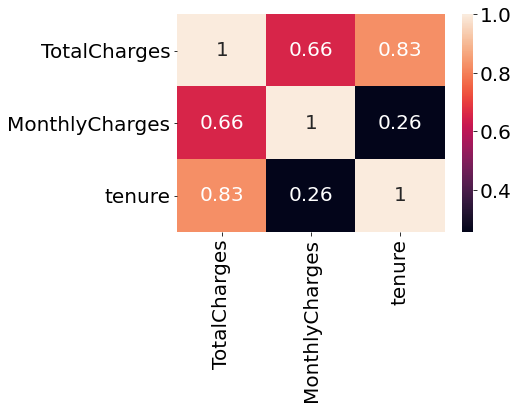

In [ ]:
ax=sns.heatmap(df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr(), annot=True)

Действительно, `TotalCharges` сильно коррелирует с `tenure` и `MonthlyCharges`. Построим графики соответствующих зависимостей.

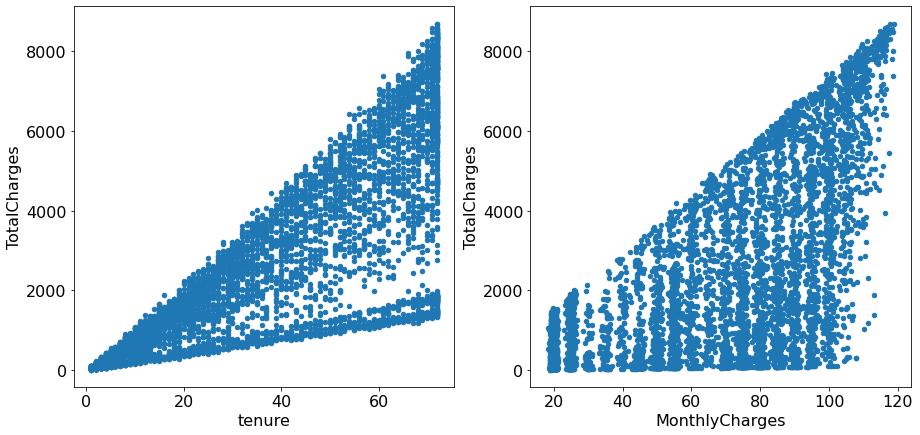

In [ ]:
plt.figure(figsize=(15, 7))
plt.rcParams['font.size'] = 16
df.plot.scatter(ax=plt.subplot(121), x='tenure', y='TotalCharges')
ax = df.plot.scatter(ax=plt.subplot(122), x='MonthlyCharges', y='TotalCharges')

Зависимости располагаются вдоль прямых, таким образом, можно высказать гипотезу, что `TotalCharges` - это произведение величины `tenure` и `MonthlyCharges`

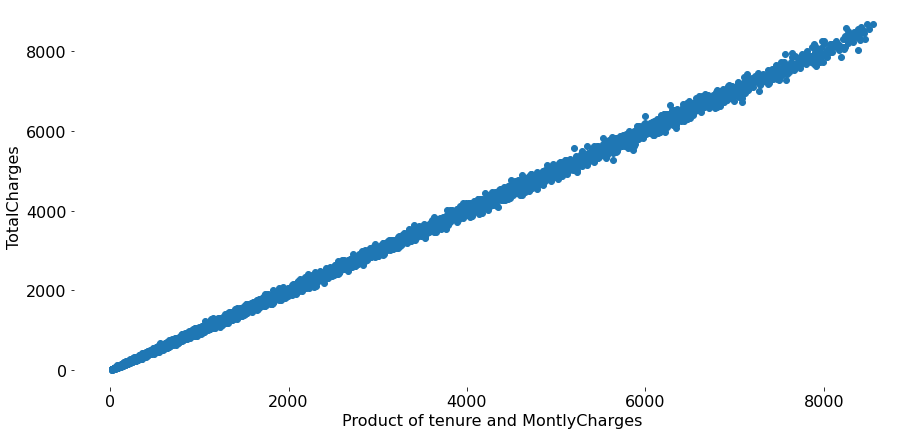

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(x=df.tenure*df.MonthlyCharges, y=df.TotalCharges)
plt.xlabel('Product of tenure and MontlyCharges')
plt.ylabel('TotalCharges')
plt.box(None)

Нет: колонка `TotalCharges` не является прямым произведением колонок `tenure` и `MonthlyCharges`, однако, имеет очень сильную корреляцию с этим произведением.

In [ ]:
print(f"Коэффициент корреляции Пирсона: " + 
      f"{np.corrcoef(df.tenure[df.TotalCharges.notna()]*df.MonthlyCharges[df.TotalCharges.notna()], df.TotalCharges[df.TotalCharges.notna()])[0,1]}")

Коэффициент корреляции Пирсона: 0.999563610728681


Корреляция `TotalCharges` c `tenure` и `MonthlyCharges` позволяет исключить колонку `TotalCharges` из рассмотрения, поскольку она не несет никакой дополнительной информации.

Гипотеза: значение `No` в колонке `InternetService` соответствует значению `No internet service` в других колонках 

In [ ]:
df[['OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV', 'StreamingMovies']][df.InternetService == "No"]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,
7010-BRBUU,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5115-SQAAU,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
0463-TXOAK,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1166-PQLGG,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
2692-PFYTJ,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...
8053-WWDRO,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8908-SLFCJ,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8215-NGSPE,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [ ]:
df[['OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV', 'StreamingMovies']][df.InternetService == "No"].nunique()

OnlineSecurity      1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
dtype: int64

Да: значение `No` в колонке `InternetService` соответствует единственному значению `No internet service` в колонках `OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies`

Гипотеза: существует корреляция между оттоком и наличием-отсутствием интернета. Для проверки сравним проценты клиентов, ушедших в отток, посчитанные для клиентов с интернетом и клиентов без интернета отдельно.

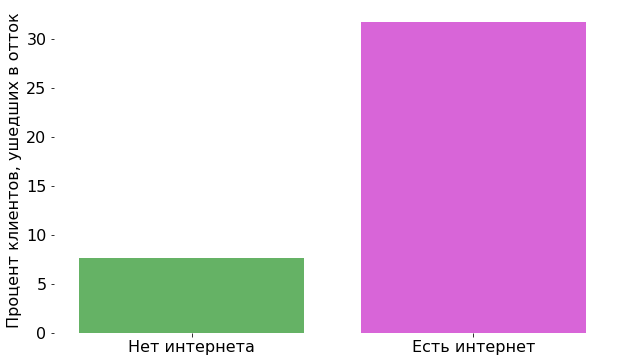

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x=['Нет интернета', 'Есть интернет'], height=[(
    df.InternetService[(df.InternetService == 'No') & (df.Churn == 0)].count() / 
    df.InternetService[(df.InternetService == 'No')].count()
) * 100.,
(
    df.InternetService[(df.InternetService != 'No') & (df.Churn == 0)].count() / 
    df.InternetService[(df.InternetService != 'No')].count()
) * 100.
], color=['g', 'm'], alpha=0.6)
plt.ylabel('Процент клиентов, ушедших в отток')
plt.box(None)

Да, корреляция есть: среди клиентов, у которых был интернет процент оттока получился существенно выше. Добавим отдельную колонку, которая содержит информацию о признаке: наличие/отсутствие интернета.

In [ ]:
df['HasInternet'] = 0
df.loc[df.InternetService != 'No', 'HasInternet'] = 1

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num,HasInternet
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,1,1,1,1,0,0,2,2,2,2,2,2,2,2,1,3,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,1,0,0,0,0,2,0,0,1,1,0,1,0,0,0,3,1
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,1,1,0,0,0,2,1,0,0,0,0,0,1,0,0,0,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,1,1,0,0,0,2,1,1,0,1,0,0,0,0,1,0,1


# 3. Построение моделей для прогнозирования оттока

Определим матрицу признаков и вектор значений целевой функции, исключив целевую переменную и `TotalCharges`, которые с высокой точностью являются просто произведением колонок `MonthlyCharges` и `tenure`, и, добавив колонку `HasInternet`.

In [ ]:
numeric_features = list(set(numeric_features) - {'Churn', 'TotalCharges'}) + ['HasInternet']
X = df[numeric_features].values
y = df.Churn

Сделаем Z-преобразование шкалы признаков.

In [ ]:
from sklearn.preprocessing import StandardScaler

Xn = StandardScaler().fit_transform(X)

Построим модель логистической регрессии для предсказания оттока клиентов, подобрав наилучшие значения для параметра регуляризации и солвер.

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, roc_auc_score

#optimized parameters
lr_params_optimized = \
{
    'C': 0.1, 
    'random_state': 17, 
    'solver': 'sag',
    'max_iter': 1000
}

lr_params = {'C':  10 ** np.arange(-2., 1.), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

if lr_params_optimized is None:
  logr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=17), param_grid=lr_params, scoring='roc_auc', cv=skf)\
    .fit(Xn, y).best_estimator_
  lr_params_optimized = logr.get_params()
else:
  logr = LogisticRegression(**lr_params_optimized).fit(Xn, y)

pd.DataFrame(lr_params_optimized, index=['Optimized logistic regression params']).transpose()

,Optimized logistic regression params
C,0.1
random_state,17
solver,sag
max_iter,1000


Модель решающих деревьев для предсказания оттока клиентов. Подбираем критерий расщепления, число фич, по которым происходит расщепление, и минимальное количество сэмплов в листе.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_params_optimized = \
{
    'criterion' : 'gini',
    'max_features' : 14,
    'min_samples_leaf' : 101,
    'random_state' : 17
}

dt_params = {
    'max_features' : np.arange(1, len(numeric_features) - 3), 
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : np.arange(1,1000,10)}

if dt_params_optimized is None:
  dt = GridSearchCV(DecisionTreeClassifier(random_state=17), param_grid=dt_params, scoring='roc_auc', cv=skf)\
    .fit(Xn, y).best_estimator_
  dt_params_optimized = dt.get_params()
else:
  dt = DecisionTreeClassifier(**dt_params_optimized).fit(Xn, y)

pd.DataFrame(dt_params_optimized, index=['Optimized decision tree params']).transpose()

,Optimized decision tree params
criterion,gini
max_features,14
min_samples_leaf,101
random_state,17


Модель опорных векторов, оптимизируем ядро и параметр регуляризации.

In [ ]:
from sklearn.svm import SVC

svc_params_optimized = \
{
    'random_state' : 17,
    'C' : 0.01
}

svc_params = {
    "C" : 10 ** np.arange(-3., 1.)
}

if svc_params_optimized is None:
  svc = GridSearchCV(SVC(random_state=17), param_grid=svc_params, scoring='roc_auc', cv=skf)\
    .fit(Xn, y).best_estimator_
  svc_params_optimized = svc.get_params()
else:
  svc = SVC(**svc_params_optimized).fit(Xn, y)

pd.DataFrame(svc_params_optimized, index=['Optimized support vector machine params']).transpose()

,Optimized support vector machine params
random_state,17.00
C,0.01


Метод ближайших соседей, оптимизираем число ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc_params_optimized = \
{
    "n_neighbors" : 19
}

knc_params = {
    "n_neighbors" : np.arange(3, 20)
}

if knc_params_optimized is None:
  knc = GridSearchCV(KNeighborsClassifier(), param_grid=knc_params, scoring='roc_auc', cv=skf)\
    .fit(Xn, y).best_estimator_
  knc_params_optimized = knc.get_params()
else:
  knc = KNeighborsClassifier(**knc_params_optimized).fit(Xn, y)

pd.DataFrame(knc_params_optimized, index=['Optimized k-neighbor classifier params']).transpose()

Стэкинг логистической регрессии, деревьев, svc и KNeighborsClassifier, c деревом решений в качестве мета-алгоритма

In [ ]:
from sklearn.ensemble import StackingClassifier

meta_params_optimized = \
{
    'C': 0.01, 
    'random_state': 17, 
    'solver': 'newton-cg',
    'max_iter': 5000
}

meta_mtx = np.array([logr.predict(Xn), dt.predict(Xn), svc.predict(Xn)]).T

if meta_params_optimized is None:
  meta = GridSearchCV(LogisticRegression(max_iter=5000), param_grid=lr_params, scoring='roc_auc', cv=skf)\
    .fit(meta_mtx, y).best_estimator_
  meta_params_optimized = meta.get_params()
else:
  meta = LogisticRegression(**meta_params_optimized).fit(meta_mtx, y)

st = StackingClassifier(estimators=
                        [
                         ('LogisticRegression', logr), 
                         ('DecisionTree', dt), 
                         ('SVM', svc),
                         ('KNeighborsClassifier', knc)
                         ], 
                        final_estimator=meta, cv=skf)

pd.DataFrame(meta_params_optimized, index=['Optimized meta-classifier params']).transpose()

,Optimized meta-classifier params
C,0.01
random_state,17
solver,newton-cg
max_iter,5000


# 4. Сравнение качества моделей 

Сравним полученные модели с использованием метрики ROC-AUC

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.2, random_state=17)

dt.fit(X_train, y_train)
logr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knc.fit(X_train, y_train)
st.fit(X_train, y_train)
print(f'Decision tree classifier: ROC-AUC = {roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])}')
print(f'Logistic regression: ROC-AUC = {roc_auc_score(y_test, logr.predict_proba(X_test)[:,1])}')
print(f'SVM classifier: ROC-AUC = {roc_auc_score(y_test, svc.decision_function(X_test))}')
print(f'K-neighbours classifier: ROC-AUC={roc_auc_score(y_test, knc.predict_proba(X_test)[:, 1])}')
print(f'Stacking classifier: ROC-AUC = {roc_auc_score(y_test, st.predict_proba(X_test)[:, 1])}')

Decision tree classifier: ROC-AUC = 0.8282676301928849
Logistic regression: ROC-AUC = 0.8350033256035521
SVM classifier: ROC-AUC = 0.8119649822934081
K-neighbours classifier: ROC-AUC=0.807132970213378
Stacking classifier: ROC-AUC = 0.8366319725323123


Сравним полученные модели по тому, насколько полно они предсказывают тех клиентов, которые останутся преданы компании.

In [ ]:
print(f'Decision tree classifier: RECALL = {recall_score(y_test, dt.predict(X_test))}')
print(f'Logistic regression: RECALL = {recall_score(y_test, logr.predict(X_test))}')
print(f'SVM classifier: RECALL = {recall_score(y_test, svc.predict(X_test))}')
print(f'K-neighbours classifier: RECALL={recall_score(y_test, knc.predict(X_test))}')
print(f'Stacking classifier: RECALL = {recall_score(y_test, st.predict(X_test))}')

Decision tree classifier: RECALL = 0.9173272933182333
Logistic regression: RECALL = 0.9048697621744054
SVM classifier: RECALL = 1.0
K-neighbours classifier: RECALL=0.8799546998867497
Stacking classifier: RECALL = 0.9592298980747452


**Выводы:** Лучше всего преданность клиентов телефонной компании предсказывается методом опорных векторов. При этом результат по ROC AUC получается лучше для логистической регрессии. Заметим, что результат использования стэкинга равен результату лучшего классификатора в обоих случаях. Таким образом, стекинг позволяет получить классификатор, который меньше зависим от выбора метрики.
